In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import torch
from torch import nn
import albumentations as A
# import torchsummary
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import random

torch.cuda.empty_cache()

BS=16
LR=0.00005
epochs=20
IS=256
D='cuda' if torch.cuda.is_available() else 'cpu'

num_classes = 7
classes=['elbow positive', 'fingers positive', 'forearm fracture', 'humerus fracture', 'humerus', 'shoulder fracture', 'wrist positive']
c2l={k:v for k,v in list(zip(classes,list(range(num_classes))))}
l2c={v:k for k,v in c2l.items()}

dir_path='c:/users/ashkanreisi/desktop/cs 791- ids/Data'
train_dir_path='c:/users/ashkanreisi/desktop/cs 791- ids/Data/train'
train_img_paths = sorted(os.listdir("c:/users/ashkanreisi/desktop/cs 791- ids/Data/train/images"))
train_target_paths = sorted(os.listdir('c:/users/ashkanreisi/desktop/cs 791- ids/Data/train/labels'))

val_dir_path='c:/users/ashkanreisi/desktop/cs 791- ids/Data/valid'
val_img_paths = sorted(os.listdir('c:/users/ashkanreisi/desktop/cs 791- ids/Data/valid/images'))
val_target_paths = sorted(os.listdir('c:/users/ashkanreisi/desktop/cs 791- ids/Data/valid/labels'))

In [17]:
#Printing the frequency of times that the quantity of coordinates is repeated"

#Saving the quantity of annotations's coordiantes for each image
Title=[]
TitleLen=[]
for i in range (3631):
    tp=os.path.join(train_dir_path,'labels',train_target_paths[i])
    Title.append(tp)
    file=open(tp,'r')
    target=list(map(float,file.read().split()))[1:]
    TitleLen.append(len(target))

# Print the results
from collections import Counter
counted = Counter(TitleLen)
numOfCords=[]
frequancy=[]
''''''
for num, freq in counted.items():
    #print(f"Annotations with {num} coordiantes is repeated {freq} times.")
    numOfCords.append(num)
    frequancy.append(freq)

i=0
while i<len(numOfCords):
    for j in range(3631):
        if TitleLen[j]==numOfCords[i]:
            #print(numOfCords[i],Title[j])
            print("Annotations with",numOfCords[i], "coordiantes is repeated", frequancy[i],"which first happened in: ",Title[j])
            break
    i=i+1

Annotations with 8 coordiantes is repeated 435 which first happened in:  c:/users/ashkanreisi/desktop/cs 791- ids/Data/train\labels\distal-humeral-fractures-2-_JPEG.rf.39ba3f53047ecb4064613850a1c76fc1.txt
Annotations with 10 coordiantes is repeated 964 which first happened in:  c:/users/ashkanreisi/desktop/cs 791- ids/Data/train\labels\distal-humeral-fractures-2-_JPEG.rf.525ce876785d0fd798ec3af1593e5bc1.txt
Annotations with 12 coordiantes is repeated 117 which first happened in:  c:/users/ashkanreisi/desktop/cs 791- ids/Data/train\labels\elbow-dislocation-with-coronoid-process-fracture_jpg.rf.234153519323ba2b9aa2e603b0a43771.txt
Annotations with 0 coordiantes is repeated 1827 which first happened in:  c:/users/ashkanreisi/desktop/cs 791- ids/Data/train\labels\image1_0_png.rf.208b9fc171409973fd0f9af79cdcfead.txt
Annotations with 21 coordiantes is repeated 162 which first happened in:  c:/users/ashkanreisi/desktop/cs 791- ids/Data/train\labels\image1_1002_png.rf.1feafce607366113c97124dc2

In [12]:
#Finding the idx of an arbitrary image 
counter=-1
for i in train_target_paths:
    counter=counter+1
    if i=="image1_1417_png.rf.9b2fc234851c22c20ef6cdd5ba1a5572.txt":
        print ("The idx of the image is: ",counter)

The idx of the image is:  496


Fractured bone within the image:  image1_4840_png.rf.e0bee19250cf4267a97a24ec18f3b65a.jpg


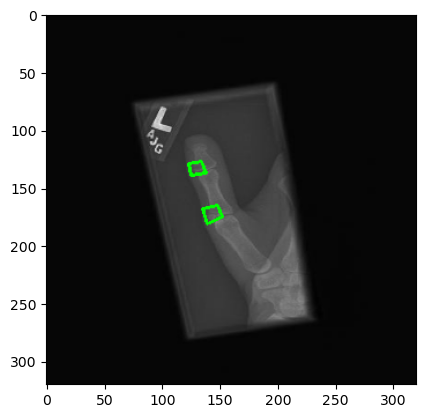

In [15]:
#Drawing polylines and images

idx=random.randint(0,3000)
# idx=0
ip=os.path.join(train_dir_path,'images',train_img_paths[idx])
tp=os.path.join(train_dir_path,'labels',train_target_paths[idx])

image=cv2.imread(ip)
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
Width=image.shape[0]
Height=image.shape[1]
image=cv2.resize(image,(320,320))

def Polylines_Method1(tp): # Puts all coordinates as pairs to be drawn as one big poyline by cv2.polylines
    target=[]   
    with open(tp,'r') as file:
        for line in file:
            temp_target=list(map(float,line.split()))[1:]#Removing the label ralting to fractural category
            target=target+temp_target
        target=[target]
    return target

def Polylines_Method2(tp):
    target=[]
    with open(tp,'r') as file:
        for line in file:
            temp_target=list(map(float,line.split()))[1:]#Removing the label ralting to fractural category
            target.append(temp_target)
    return target

#targets=Polylines_Method1(tp)
targets=Polylines_Method2(tp)
if len(targets)==0:
    print("No fractured bone within the image: ",train_img_paths[idx])
    plt.imshow(image)
    plt.show()

else:    
    print("Fractured bone within the image: ",train_img_paths[idx])
    vertices=[]
    for target in targets:
        vertices=[0]*len(target)# To store the cordinates of the fractured part of the image
        for i in range(len(target)):
            vertices[i]=int(target[i]*320)
        
        vertices=np.array(vertices)
        if len(vertices)!=0:
            vertices = vertices.reshape(-1,1,2) 
            image_with_rectangle=cv2.polylines(image, [vertices], isClosed=True, color=(0, 255, 0), thickness=2)

            plt.imshow(image)
            #plt.show()